##### Image -> UNet -> CNN -> Prediction

In [32]:
#Move working directory to app

import os
os.chdir('/home/papafrita/Projects/skin_cancer_tool/Skin_cancer_diagnosis_tool/src/app')

In [33]:
#Create mask using trained Unet

#Import Unet model
import model_unet as unet

In [34]:
#Set-up and load Unet model
model_weights_dir = '/home/papafrita/Projects/skin_cancer_tool/Skin_cancer_diagnosis_tool/models/checkpoint/cp-0022.weights.h5'

#Setup parameters
unet_params = unet.Parameters()
unet_ori_params = unet.Parameters(600, 450)
classes = ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']

#Import model and print summary
model_unet = unet.buil_model(unet_params)
unet.load_train_model(model_unet, unet_params, trained = True, model_weights=model_weights_dir)
model_unet.summary()

/home/papafrita/miniconda3/envs/pytorch_tf/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 94 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "functional_23"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 448, 448,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_46 (Conv2D)  │ (None, 448, 448,  │      1,792 │ input_layer_2[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_47 (Conv2D)  │ (None, 448, 448,  │     36,928 │ conv2d_46[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_8     │ (None, 224, 224,  │          0 │ conv2d_47[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_48 (Conv2D)  │ (None, 224, 224,  │     73,856 │ max_pooling2d_8[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_49 (Conv2D)  │ (None, 224, 224,  │    147,584 │ conv2d_48[0][0]   │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_9     │ (None, 112, 112,  │          0 │ conv2d_49[0][0]   │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_50 (Conv2D)  │ (None, 112, 112,  │    295,168 │ max_pooling2d_9[… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_51 (Conv2D)  │ (None, 112, 112,  │    590,080 │ conv2d_50[0][0]   │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_10    │ (None, 56, 56,    │          0 │ conv2d_51[0][0]   │
│ (MaxPooling2D)      │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_52 (Conv2D)  │ (None, 56, 56,    │  1,180,160 │ max_pooling2d_10… │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_53 (Conv2D)  │ (None, 56, 56,    │  2,359,808 │ conv2d_52[0][0]   │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_11    │ (None, 28, 28,    │          0 │ conv2d_53[0][0]   │
│ (MaxPooling2D)      │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_54 (Conv2D)  │ (None, 28, 28,    │  4,719,616 │ max_pooling2d_11… │
│                     │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_55 (Conv2D)  │ (None, 28, 28,    │  9,438,208 │ conv2d_54[0][0]   │
│                     │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ up_sampling2d_8     │ (None, 56, 56,    │          0 │ conv2d_55[0][0]   │
│ (UpSampling2D)      │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_56 (Conv2D)  │ (None, 56, 56,    │  2,097,664 │ up_sampling2d_8[

 Total params: 31,031,745 (118.38 MB)

 Trainable params: 31,031,745 (118.38 MB)

 Non-trainable params: 0 (0.00 B)

In [35]:
model_unet.save('/home/papafrita/Projects/skin_cancer_tool/Skin_cancer_diagnosis_tool/models/uNet_segmentation_predictor.keras')

In [36]:
import tensorflow as tf
import PIL 

img_src = '/home/papafrita/Projects/skin_cancer_tool/Skin_cancer_diagnosis_tool/data/images/ISIC_0024307.jpg'
img = tf.keras.preprocessing.image.load_img(img_src,
                   target_size=(448, 448))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_rec = tf.keras.utils.array_to_img(img_array).resize((600,450))

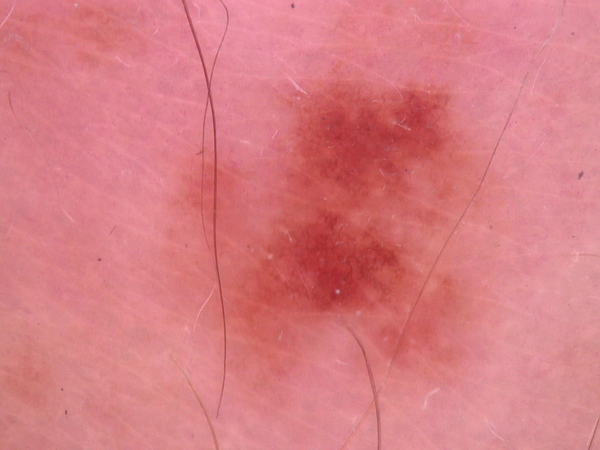

In [37]:
PIL.Image.open(img_src)

In [38]:
import tensorflow as tf

model_cnn = tf.keras.models.load_model('/home/papafrita/Projects/skin_cancer_tool/Skin_cancer_diagnosis_tool/models/CNN_97_diagnosis_segmented.keras')

In [39]:
import PIL.Image as Image
import numpy as np

j=0
image = os.listdir('/home/papafrita/Projects/skin_cancer_tool/Skin_cancer_diagnosis_tool/data/images')[j]
image_path = '/home/papafrita/Projects/skin_cancer_tool/Skin_cancer_diagnosis_tool/data/images/{}'.format(image)

image_mask = unet.predict_single_image(model_unet, 
                                       image_path, 
                                       train_params=unet_params, 
                                       original_params=unet_ori_params)
def process_mask(image_path, mask):
    processed_image = Image.composite(Image.open(image_path), mask.convert('RGB'), mask.convert('L'))
    return np.expand_dims(processed_image, axis=0)

masked_image = process_mask(image_path, image_mask)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


In [40]:
#Use Unet processed image to 
#predict label probabilities using 97M_CNN
import model_cnn as cnn
cnn.get_version()

TensorFlow version: 2.17.0
Num GPUs Available:  0


In [58]:
masked_img_pred = model_cnn(masked_image, training=False).numpy().flatten()

In [59]:
for i, prediction in enumerate(masked_img_pred):
    print(i, prediction)

0 0.01917451
1 0.032487676
2 0.13929212
3 0.008826207
4 0.19558583
5 0.5936303
6 0.011003296


In [1]:
import pandas as pd

img_code = image_path[-16:-4]

result_df = pd.DataFrame(masked_img_pred, columns=classes)
result_df['img_code'] = img_code
result_df.head()

NameError: name 'image_path' is not defined

In [2]:
metadata = pd.read_csv('/home/papafrita/Projects/skin_cancer_tool/Skin_cancer_diagnosis_tool/data/HAM10000_metadata.tab')
metadata.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,vidir_modern
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,vidir_modern
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,vidir_modern
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,vidir_modern
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,vidir_modern


In [3]:
#RF model classes
dx_classes = {'nv': 0 , 'mel': 6, 'bkl': 3, 'bcc': 4, 'vasc': 2, 'akiec': 5, 'df': 1}

from sklearn.preprocessing import LabelEncoder

label_encoder_sex = LabelEncoder()
metadata['sex'] = label_encoder_sex.fit_transform(metadata['sex'])

label_encoder_localization = LabelEncoder()
metadata['localization'] = label_encoder_localization.fit_transform(metadata['localization'])


In [7]:
label_encoder_localization.classes_

array(['abdomen', 'acral', 'back', 'chest', 'ear', 'face', 'foot',
       'genital', 'hand', 'lower extremity', 'neck', 'scalp', 'trunk',
       'unknown', 'upper extremity'], dtype=object)

In [113]:
selected_img = metadata[metadata['image_id'] == img_code]
selected_img

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset
3343,HAM_0006416,ISIC_0028137,nv,follow_up,35.0,0,14,vidir_molemax


In [114]:
#Load RF Model
import joblib

model_rf = joblib.load('/home/papafrita/Projects/skin_cancer_tool/Skin_cancer_diagnosis_tool/models/model_Random_Forest.pkl')

selected_img_x = selected_img[['age', 'sex', 'localization']]
predicted_rf = model_rf.predict_proba(selected_img_x).flatten()

In [115]:
rf_classes = ['nv', 'df', 'vasc', 'bkl', 'bcc', 'akiec', 'mel']

In [117]:
print('True value: {}'.format(selected_img['dx'].values[0]))

print("RF prediction:")
for i, label in enumerate(rf_classes):
    
    print(label, f"{predicted_rf[i]*100:.2f}")
print("\n")

print("CNN prediction:")
for i, label in enumerate(rf_classes):
    print(label, f"{result_df.loc[0,label]*100:.2f}")
print("\n")

print("Combined prediction:")
for i, label in enumerate(rf_classes):
    print(label, f"{np.mean([predicted_rf[i]*100, result_df.loc[0,label]*100]):.2f}")

True value: nv
RF prediction:
nv 82.78
df 0.00
vasc 0.00
bkl 0.00
bcc 0.00
akiec 0.00
mel 17.22


CNN prediction:
nv 59.36
df 0.88
vasc 1.10
bkl 13.93
bcc 3.25
akiec 1.92
mel 19.56


Average prediction:
nv 71.07
df 0.44
vasc 0.55
bkl 6.96
bcc 1.62
akiec 0.96
mel 18.39


In [15]:
models = {'unet':23, 'cnn':32, 'rf':44}

list(models.values())

[23, 32, 44]

In [25]:
types = ['img', 'image', 'metadata']

image_types = [i for i, x in enumerate(types) if x == 'img' or x == 'image']

In [26]:
image_types

[0, 1]